## Perceptron Neural Network Model

In [1]:
% Created: 2016/02/05, 24 Cummington, Boston
%  Byron Price
% Updated: 2016/02/08
%   By: Byron Price

% All functions called are placed in this directory.

%% This code will implement a perceptron that 
%%  will be capable of recognizing handwritten text

%% Simple perceptron rule
%%   If w is a connection strength vector (or weight) 
%%   and x is an input vector, then 
%%     output = 0 if w*x + b <= 0
%%     output = 1 if w*x + b > 0 
%%   where * is the dot product of all inputs by their
%%   respective weights

%% Sigmoid perceptron
%%  If x is an input vector and w a connection strength
%%  vector, then output = 1/(1+exp(-(w*x+b)))
%%
%% See www.neuralnetworksanddeeplearning.com for more information.


## Draw a Few Figures of Digits from MNIST Training Dataset

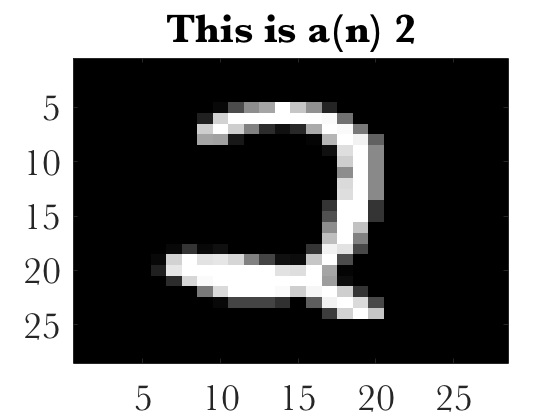

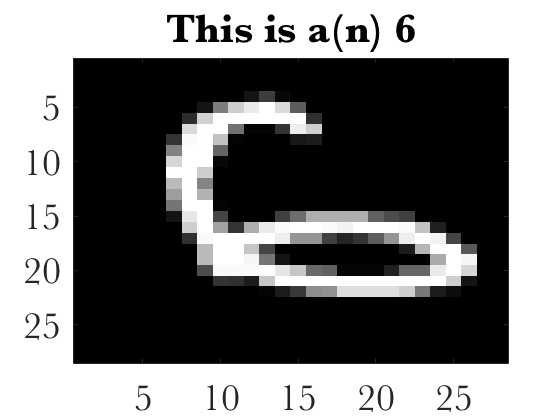

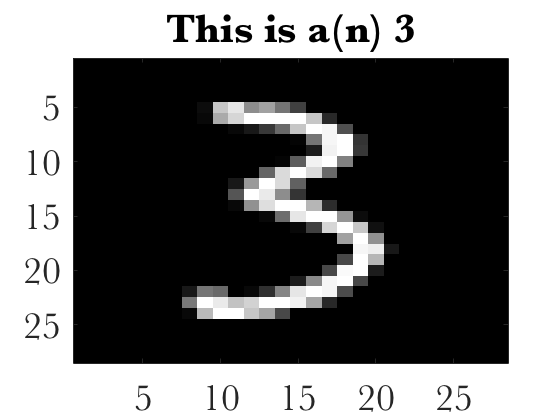

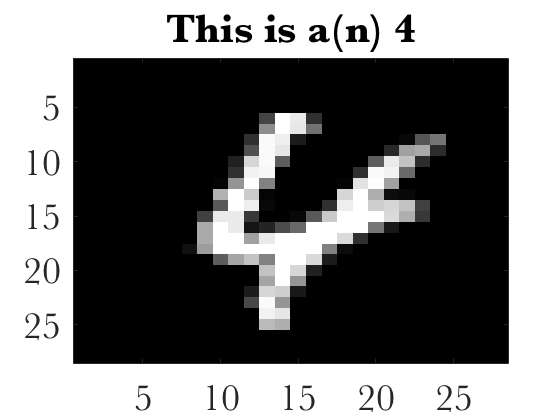

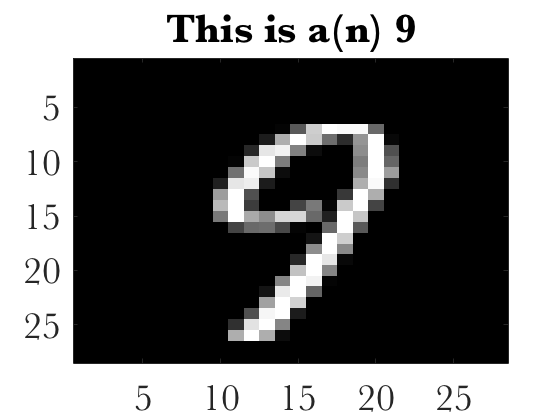

In [1]:
load('TrainingData.mat')

numImages = size(Images,2);
numPixels = size(Images,1);

for i=1:5
    index = round(rand*numImages);
    digit = Labels(index);
    image = reshape(Images(:,index),[28,28]);
    figure();imagesc(image);title(sprintf('This is a(n) %i',digit));
    colormap gray;
end

## Build a Network with Randomized Weights and Biases

In [2]:
numDigits = 10;
numHidden = 15;
myNet = Network([numPixels,numHidden,numDigits]); % from a function
     % in this directory, builds a 3-layer network

In [3]:
myNet

myNet = 

    Weights: {[784x15 double]  [15x10 double]}
     Biases: {[15x1 double]  [10x1 double]}


## Convert Labels Matrix to Format Suitable for Comparison to Network Output

In [4]:
DesireOutput = zeros(numDigits,numImages);

for ii=1:numImages
    numVector = zeros(numDigits,1);
    for jj=1:numDigits
        if Labels(ii) == jj-1
            numVector(jj) = 1;
            DesireOutput(:,ii) = numVector;
        end
    end
end

In [5]:
size(Images)
size(DesireOutput)

ans =

         784       60000


ans =

          10       60000


## Stochastic Gradient Descent

In [10]:
batchSize = 10; % make mini batches and run the algorithm
     % on those "runs" times
runs = 1e4;
eta = 0.5; % learning rate
numCalcs = size(myNet.Weights,2);
dCostdWeight = cell(1,numCalcs);
dCostdBias = cell(1,numCalcs);

for ii=1:runs
    indeces = ceil(rand([batchSize,1]).*(numImages-1));
    for jj=1:numCalcs
        layer1 = size(myNet.Weights{jj},1);
        layer2 = size(myNet.Weights{jj},2);
        dCostdWeight{jj} = zeros(layer1,layer2);
        dCostdBias{jj} = zeros(layer2,1);
    end
    for jj=1:batchSize
        index = indeces(jj);
        [costweight,costbias] = BackProp(Images(:,index),myNet,...
        DesireOutput(:,index));
        for kk=1:numCalcs
            dCostdWeight{kk} = dCostdWeight{kk}+costweight{kk};
            dCostdBias{kk} = dCostdBias{kk}+costbias{kk};
        end
    end
    [myNet] = GradientDescent(myNet,dCostdWeight,dCostdBias,batchSize,eta,numImages);
end

## Run Network Against Test Data

In [11]:
clear Images Labels;
load('TestData.mat')
numImages = size(Images,2);
numPixels = size(Images,1);
numDigits = 10;

DesireOutput = zeros(numDigits,numImages);

for ii=1:numImages
    numVector = zeros(numDigits,1);
    for jj=1:numDigits
        if Labels(ii) == jj-1
            numVector(jj) = 1;
            DesireOutput(:,ii) = numVector;
        end
    end
end

classifiedVals = zeros(numImages,1);
count = 0;
for ii=1:numImages
    [Output,Z] = Feedforward(Images(:,ii),myNet);
    [~,realVal] = max(DesireOutput(:,ii));
    [~,netVal] = max(Output{2});
    classifiedVals(ii) = netVal-1;
    if realVal == netVal
    count = count+1;
    end
end
Accuracy = count/numImages

Accuracy =

    0.9367


## Display Figures for the Network's Classification of the Novel Test Data

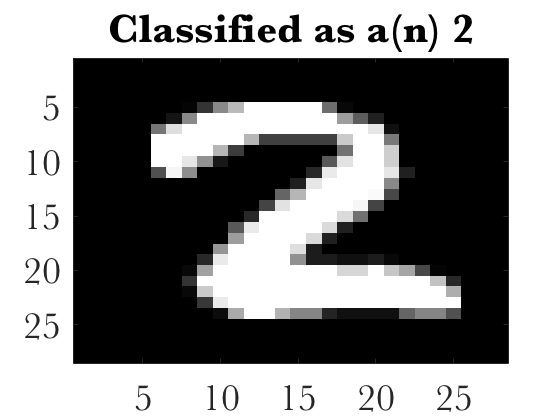

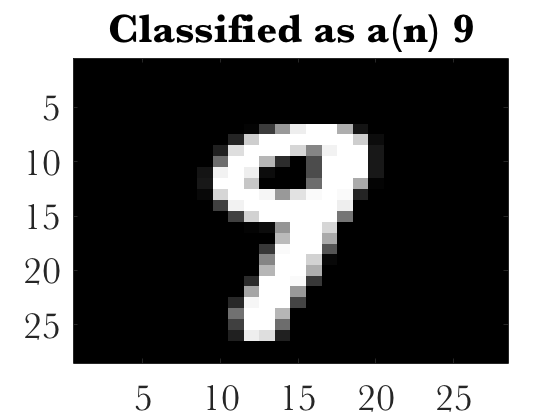

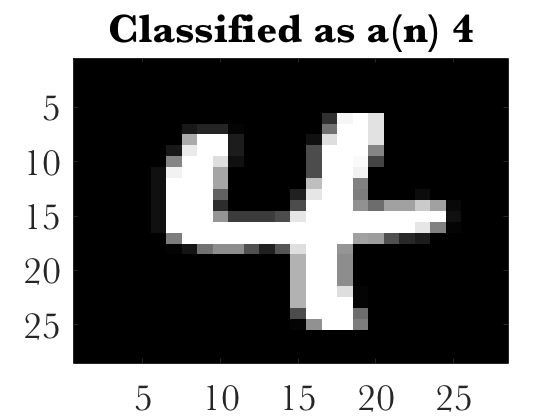

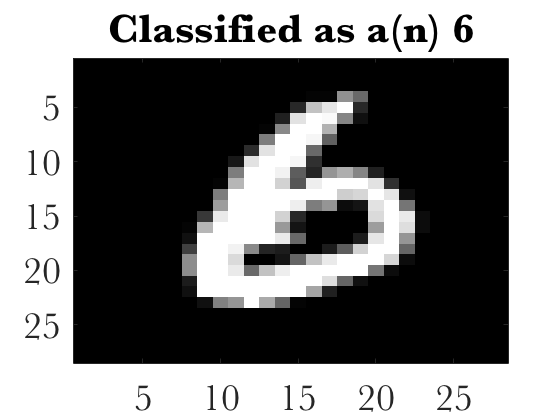

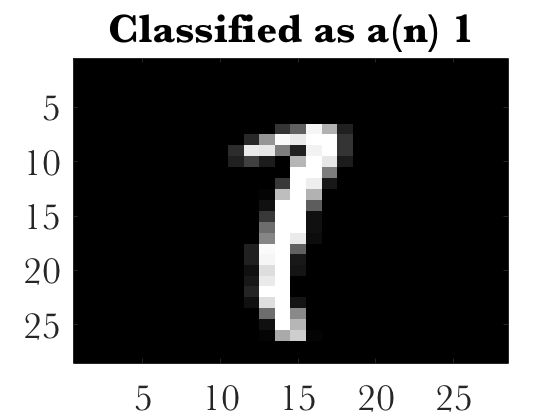

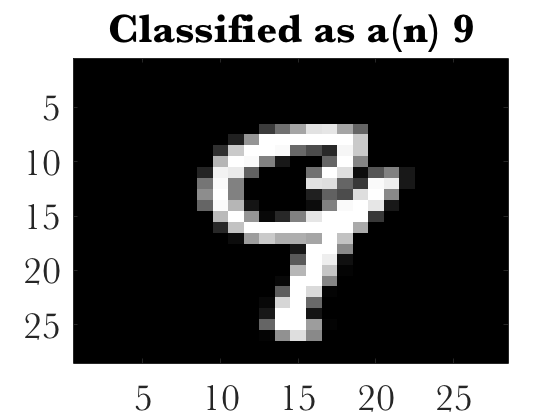

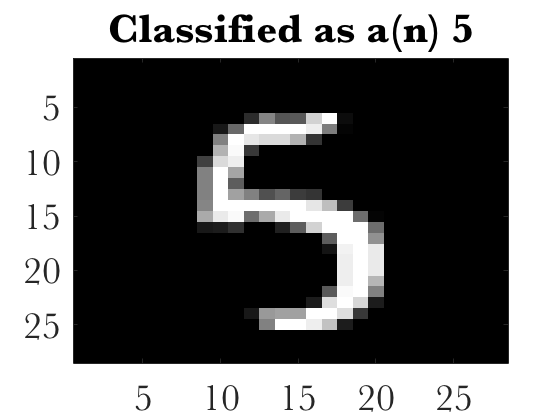

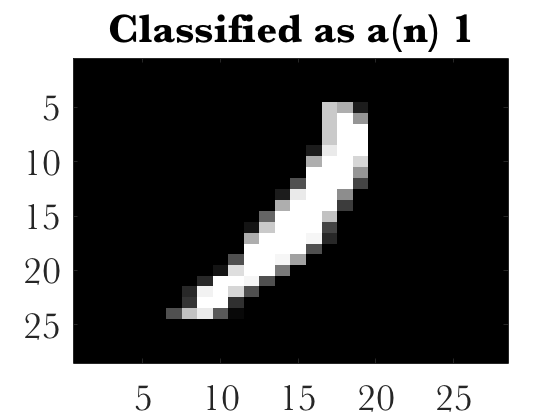

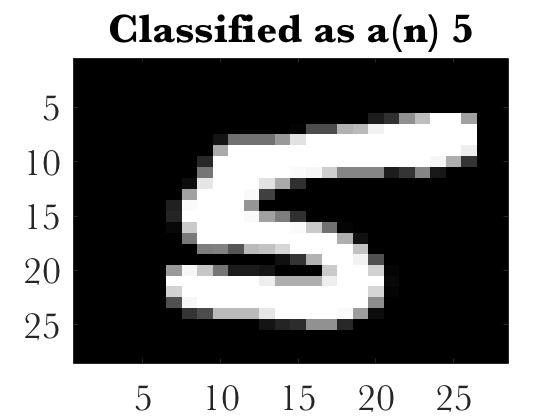

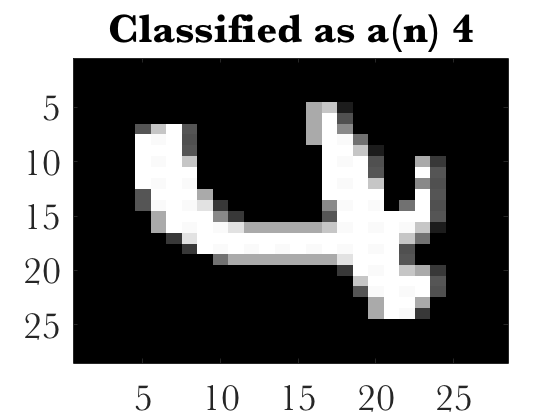

In [12]:
for ii=1:10
    index = ceil(rand*(numImages-1));
    digit = classifiedVals(index);
    image = reshape(Images(:,index),[28,28]);
    figure();imagesc(image);title(sprintf('Classified as a(n) %i',digit));
    colormap gray;
end